## Machine Learning with Python and Scikit Learn

Follow presentation on: http://bit.ly/ML-SpringCampus


Notes for me:
- Remove always show toolbar before starting
- Set zoom to 150%
- check there is internet

## What is Machine Learning?

The process of teaching computers to learn from data.

### Learning tasks:

- Clustering

- Regression

- Outlier Detection

- Classification

- Time series prediction


## The data

A dataset is a set of examples used to train a Machine Learning model

An example contains information about an object or event;

The example is represented by its features.


## Supervised vs Unsupervised Learning



## Supervised:

#### Classification vs Regression

__Classifier__: Predictor with a categorical

__Regressor__: Predictor with a continuous output



Imagine you a program to help you trade stocks and make money from it. There are two possible ways of facing this problem, you can make a problem to predict the price of the stock each day or you can make a program that just tells you whether you shoul __buy__, __sell__ or __do nothing__ each day.

--------

## Unsupervised Learning

Unsupervised Learning is to try to learn something from data, but without having any labels




# Supervised
## Let's look at some code:

In [1]:
import numpy as np
import pandas as pd

from time import time

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split


import warnings
warnings.filterwarnings(action="ignore", module="scipy",
                        message="^internal gelsd")


# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])


In [2]:
def predict_mesh(X, clf, gap=0.3, h=0.01):
    x_min, x_max = X[:, 0].min() - gap, X[:, 0].max() + gap
    y_min, y_max = X[:, 1].min() - gap, X[:, 1].max() + gap

    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    return (xx, yy, Z)

In [3]:
def describe_example_boston_dataset(example):
    if(example.shape != (13,)):
        print("Unable to describe")
        return
    for i in range(0, 13):
        print("Feature: {:8s} - {:8.2f}".format(boston_dataset.feature_names[i], example[i]))

# Boston House Prices 

In [ ]:
boston_dataset = datasets.load_boston()
print(boston_dataset.DESCR)

X = boston_dataset.data
Y = boston_dataset.target

In [ ]:
names = list(boston_dataset.feature_names) + ['Price']

labels = np.reshape(Y,
                     (Y.shape[0], 1))
df = pd.DataFrame(data=np.concatenate((X, labels), axis=1),
                 columns=names)
df.head(10)

In [ ]:
df.describe()

In [ ]:
# Look at the data

fig = plt.figure(figsize=(15,10))
ax1 = fig.add_subplot(2,3,1)
ax2 = fig.add_subplot(2,3,2)
ax3 = fig.add_subplot(2,3,3)
ax4 = fig.add_subplot(2,3,4)
ax5 = fig.add_subplot(2,3,5)
ax6 = fig.add_subplot(2,3,6)

ax1.scatter(x = X[:,0], y=Y, alpha= 0.3)
ax1.set_xlabel('per capita crime', fontsize=14)
ax1.set_ylabel('Median value', fontsize=14)


ax2.scatter(x = X[:,4], y=Y, alpha= 0.3)
ax2.set_xlabel('nitric oxides concentration', fontsize=14)
ax2.set_ylabel('Median value', fontsize=14)

ax3.scatter(x = X[:,5], y=Y, alpha= 0.3)
ax3.set_xlabel('average number of rooms ', fontsize=14)
ax3.set_ylabel('Median value', fontsize=14)


ax4.scatter(x = X[:,9], y=Y, alpha= 0.3)
ax4.set_xlabel('full-value property-tax per 10.000$', fontsize=14)
ax4.set_ylabel('Median value', fontsize=14)


ax5.scatter(x = X[:,6], y=Y, alpha= 0.3)
ax5.set_xlabel('AGE', fontsize=14)
ax5.set_ylabel('Median value', fontsize=14)


ax6.scatter(x = X[:,12], y=Y, alpha= 0.3)
ax6.set_xlabel('LSTAT', fontsize=14)
ax6.set_ylabel('Median value', fontsize=14)
 
plt.show()

## First model  Linear Regression 

Who has heard of it? who has used it? maybe with Excel?



    
<img src="https://imgs.xkcd.com/comics/linear_regression.png" title="XKCD: Linear Regression" width="640" height="427" />

_The 95% confidence interval suggests Rexthor's dog could also be a cat, or possibly a teapot._

In [ ]:
model = LinearRegression()

model.fit(X, Y)

r2 = model.score(X, Y)

print("R^2 value: {:0.3f}".format(r2))


In [ ]:
example_n = np.random.randint(0, Y.shape[0])

describe_example_boston_dataset(X[example_n])

print("\n\nPredicted price: {:2.2f} Real value: {:2.2f}".format(model.predict(X[example_n].reshape(1, -1))[0],
                                                            Y[example_n]))

## Distinguishing Species of Iris plants:

<br><br>
<img src="https://c1.staticflickr.com/1/402/31713322286_8c85f8b6b6_z.jpg" title="Iris flower" width="640" height="427" />

[Source: Big Cypress National Preserve](https://www.flickr.com/photos/bigcypressnps/31713322286/in/photolist-Qjp4QJ-ha3kMy-4KVwB4-4Minkn-fb7Jye-sb5tXz-dsWnJ9-4LhUuW-6oioBi-4LhUdA-GFsivk-szxsRT-dkse9b-4KVwk4-GPNUCc-dksd7u-ha6uis-dtXQmu-2enBH-qsaLo7-qsaUYy-rp5XxE-rp9N4p-r7JFac-r5SjCe-dksdro-dkscBm-HKf4AB-LcBBEv-dksbkv-dksb2i-dksa8H-dksbDi-rRTCUf-wRiRYq-dksd3N-dkscSd-dkscP5-dksag6-a2hYQC-e26B2-r7AuaS-rp6h47-2enc6-r7CpdL-r7H5uH-r7C435-rmT8D1-r7BefQ-J4WHV)

In [4]:
iris_dataset = datasets.load_iris()

print("Features: " + str(iris_dataset.feature_names))
print("Classes: " + str(iris_dataset.target_names))

X = iris_dataset.data
y = iris_dataset.target



Features: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Classes: ['setosa' 'versicolor' 'virginica']


In [5]:
# Put them in a random order
idx = np.random.permutation(150)
y = y[idx]
X = X[idx]

labels = np.reshape(y,
                    (y.shape[0], 1))
df = pd.DataFrame(data=np.concatenate((X, labels), axis=1),
                 columns=iris_dataset.feature_names + ['Class'])
df.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Class
0,6.3,3.3,6.0,2.5,2.0
1,5.5,3.5,1.3,0.2,0.0
2,6.2,2.8,4.8,1.8,2.0
3,5.9,3.0,5.1,1.8,2.0
4,7.6,3.0,6.6,2.1,2.0
5,6.5,3.2,5.1,2.0,2.0
6,5.0,3.5,1.3,0.3,0.0
7,5.4,3.0,4.5,1.5,1.0
8,6.3,2.5,4.9,1.5,1.0
9,4.9,2.5,4.5,1.7,2.0


In [6]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Class
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667,1.000000
std,0.828066,0.433594,1.764420,0.763161,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


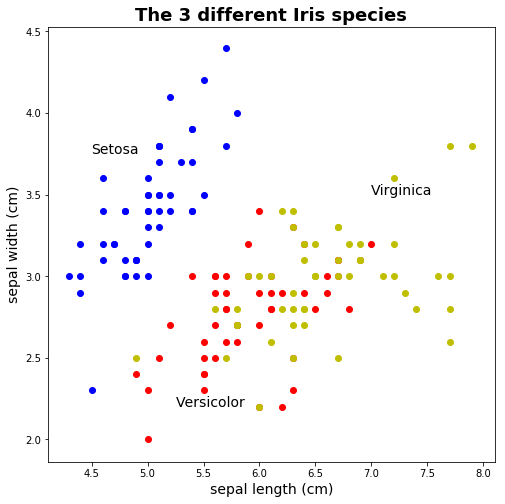

In [7]:
# Let's take a peak at the data:
plt.figure(figsize=(8,8))
colors = "bry"
for i, color in zip([0, 1, 2], colors):
    idx = np.where(y == i)
    plt.scatter(X[idx, 0], X[idx, 1], c=color, cmap=plt.cm.Paired)
    
plt.text(5.25, 2.20, "Versicolor", fontsize=14)
plt.text(7, 3.5, "Virginica", fontsize=14)
plt.text(4.5, 3.75, "Setosa", fontsize=14)

plt.title("The 3 different Iris species", fontsize=18, 
          fontweight='bold')    
plt.xlabel(iris_dataset.feature_names[0], fontsize=14)
plt.ylabel(iris_dataset.feature_names[1], fontsize=14)

plt.show()

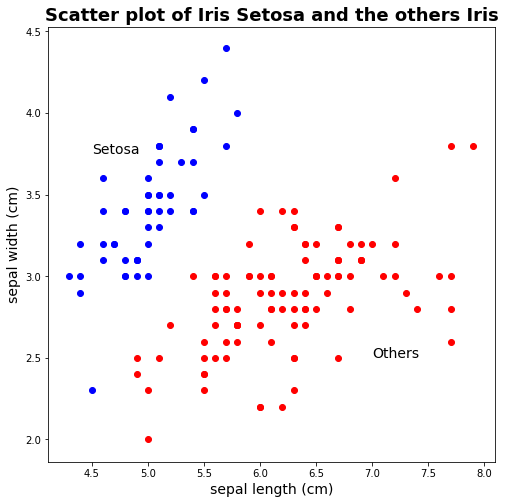

In [12]:
# We will focus identifying only the Iris Setosa
plt.figure(figsize=(8,8))
colors = "br"

idx = np.where(y == 0) # Give me the indices of the Iris Setosa examples

plt.scatter(X[idx, 0], X[idx, 1], c='b', cmap=plt.cm.Paired)
plt.text(4.5, 3.75, "Setosa", fontsize=14)

idx = np.where(y != 0) # where it's not Iris Setosa 
plt.scatter(X[idx, 0], X[idx, 1], c='r', cmap=plt.cm.Paired)
plt.text(7.0, 2.5, "Others", fontsize=14)


plt.title("Scatter plot of Iris Setosa and the others Iris",
          fontsize=18, fontweight='bold')  
plt.xlabel(iris_dataset.feature_names[0], fontsize=14)
plt.ylabel(iris_dataset.feature_names[1], fontsize=14)
plt.show()

### Second model  Logistic Regression


In [9]:
# We only care about whether each flower is a Iris Setosa and we are looking only at two of their features

X = iris_dataset.data
y = iris_dataset.target

new_y = y == 0

model = LogisticRegression(random_state=42, verbose=0)

model.fit(X[:,0:2], new_y)

accuracy = model.score(X[:,0:2], new_y)

print("Accuracy: {:0.3f}%".format(accuracy))


Accuracy: 0.993%


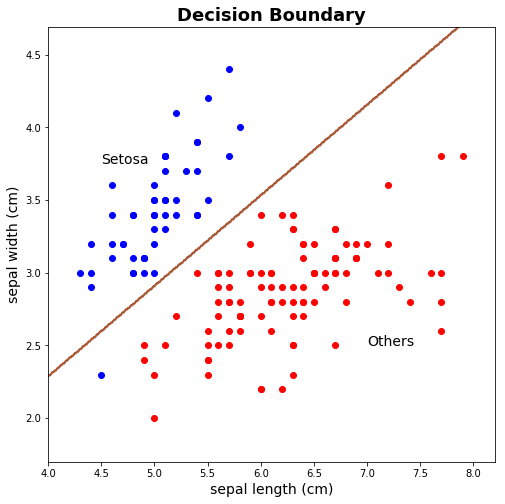

In [13]:
# Let's take a look at what our model is doing

# First plot the examples
plt.figure(figsize=(8,8))
colors = "br"

idx = np.where(y == 0)
plt.scatter(X[idx, 0], X[idx, 1], c='b', cmap=plt.cm.Paired)
plt.text(4.5, 3.75, "Setosa", fontsize=14)

idx = np.where(y != 0)
plt.scatter(X[idx, 0], X[idx, 1], c='r', cmap=plt.cm.Paired)
plt.text(7.0, 2.5, "Others", fontsize=14)

(xx, yy, Z) = predict_mesh(X, model)
plt.contour(xx, yy, Z, cmap=plt.cm.Paired)


plt.title("Decision Boundary", fontsize=18, fontweight='bold')   
plt.xlabel(iris_dataset.feature_names[0], fontsize=14)
plt.ylabel(iris_dataset.feature_names[1], fontsize=14)
plt.show()

## Linear Regression and Logistic Regression

### So how do these models work?

Let's start with linear regression:

$$ \hat{y} = w_0 + w_1.x_1 + w_2.x_2 + w_3.x_3$$ 

Adding a $x_0=1$ we get


$$ \hat{y} = w^T \cdot x $$

For each variable we have a weight, an "importance", and the linear combination of the weights and features results in our estimated value $\hat{y}$.

Questions?




#### How do we find the weights?

It's an optimization problem we want to find the weights that minimize the error over all the examples we have for training.

We can use any kind of optimization.



### Logistic Regression

We want to use the same linear model  but now build a classifier.


For that we use the Logistic/Signmoid function .

taking:

$$ \hat{y} = w^T \cdot x $$


$$ \hat{y} = g(w^T \cdot x) $$

where: 

$$g(z) = \frac{1}{1 + e^{-z}}$$




In [ ]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

x = np.arange(-20, 20, 0.001)
y = sigmoid(x)

plt.figure(figsize=(10,5))
plt.plot(x, y)
plt.title("Sigmoid Function", fontsize=14)
plt.show()

# Now to a real world example! 

Let's take the knowledge we gained and try to apply it to a real world dataset.





 
# Scotch!
![Scotch whiskies](https://c1.staticflickr.com/7/6184/6105844311_dc4c31b8b7_b.jpg)
[Source: Damien Pollet](https://flic.kr/p/aiy3MM)

# First look at the data

We will use [Pandas: Python Data Analysis Library](http://pandas.pydata.org/)

In [14]:
# Read the data file and drop the collumns we don't care about:
whisky_dataframe = pd.read_csv(filepath_or_buffer="whiskies.csv", header=0, sep=',', index_col=1)
whisky_dataframe.drop(['RowID', 'Postcode', ' Latitude', ' Longitude'], inplace=True, axis=1)
whisky_dataframe.head()

,Body,Sweetness,Smoky,Medicinal,Tobacco,Honey,Spicy,Winey,Nutty,Malty,Fruity,Floral
Distillery,,,,,,,,,,,,
Aberfeldy,2,2,2,0,0,2,1,2,2,2,2,2
Aberlour,3,3,1,0,0,4,3,2,2,3,3,2
AnCnoc,1,3,2,0,0,2,0,0,2,2,3,2
Ardbeg,4,1,4,4,0,0,2,0,1,2,1,0
Ardmore,2,2,2,0,0,1,1,1,2,3,1,1


In [15]:
whisky_dataframe.describe()

,Body,Sweetness,Smoky,Medicinal,Tobacco,Honey,Spicy,Winey,Nutty,Malty,Fruity,Floral
count,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000
mean,2.069767,2.290698,1.534884,0.546512,0.116279,1.244186,1.383721,0.976744,1.465116,1.802326,1.802326,1.697674
std,0.930410,0.717287,0.863613,0.990032,0.322439,0.853175,0.784686,0.932760,0.821730,0.629094,0.779438,0.855017
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000
50%,2.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000
75%,2.000000,3.000000,2.000000,1.000000,0.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000
max,4.000000,4.000000,4.000000,4.000000,1.000000,4.000000,3.000000,4.000000,4.000000,3.000000,3.000000,4.000000


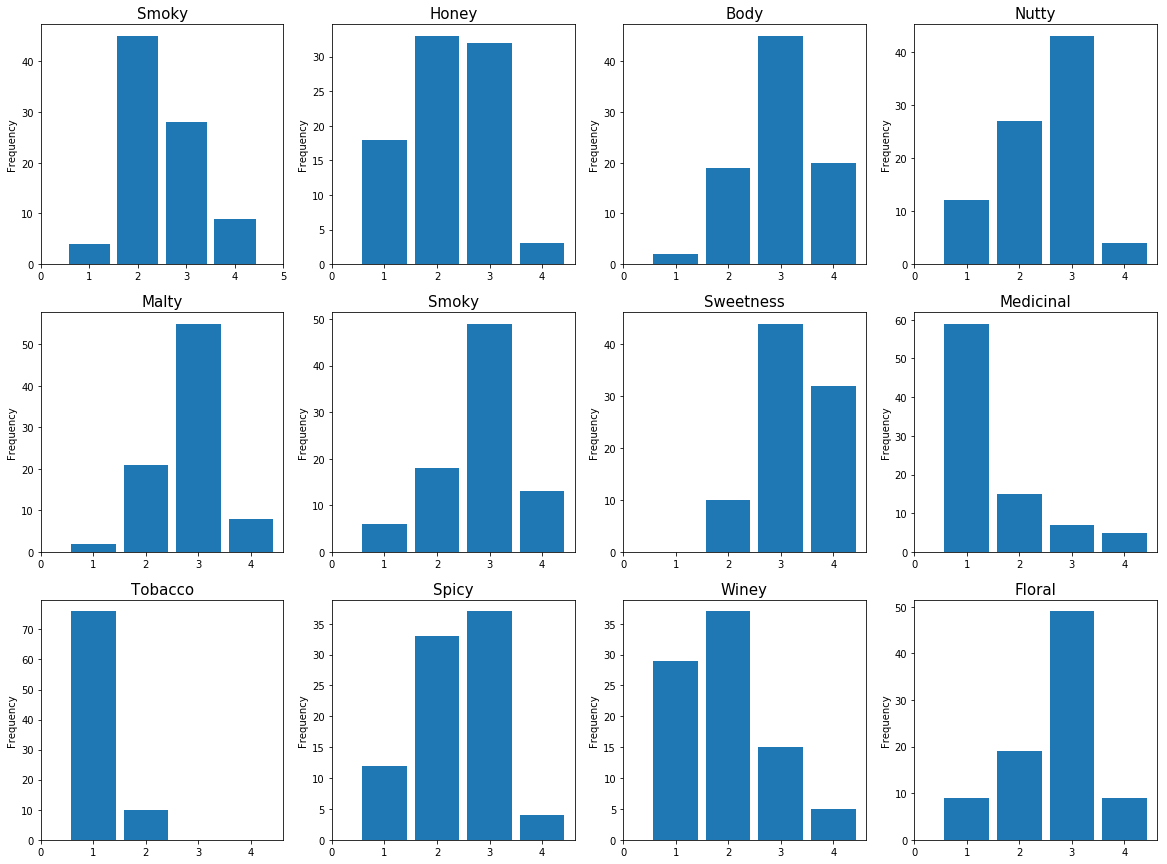

In [16]:
fig = plt.figure(figsize=(20,15))
ax1 = fig.add_subplot(3,4,1)
ax2 = fig.add_subplot(3,4,2)
ax3 = fig.add_subplot(3,4,3)
ax4 = fig.add_subplot(3,4,4)
ax5 = fig.add_subplot(3,4,5)
ax6 = fig.add_subplot(3,4,6)
ax7 = fig.add_subplot(3,4,7)
ax8 = fig.add_subplot(3,4,8)
ax9 = fig.add_subplot(3,4,9)
ax10 = fig.add_subplot(3,4,10)
ax11 = fig.add_subplot(3,4,11)
ax12 = fig.add_subplot(3,4,12)

ax1.hist(x=whisky_dataframe['Smoky'], bins=range(0,5), rwidth=0.85, align='right')
ax1.set_title("Smoky", fontsize=15)
ax1.set_xticks([0,1,2,3,4,5])
ax1.set_ylabel('Frequency')

ax2.hist(x=whisky_dataframe['Honey'], bins=range(0,5), rwidth=0.85, align='right')
ax2.set_title("Honey", fontsize=15)
ax2.set_xticks([0,1,2,3,4])
ax2.set_ylabel('Frequency')

ax3.hist(x=whisky_dataframe['Body'], bins=range(0,5), rwidth=0.85, align='right')
ax3.set_title("Body", fontsize=15)
ax3.set_xticks([0,1,2,3,4])
ax3.set_ylabel('Frequency')

ax4.hist(x=whisky_dataframe['Nutty'], bins=range(0,5), rwidth=0.85, align='right')
ax4.set_title("Nutty", fontsize=15)
ax4.set_xticks([0,1,2,3,4])
ax4.set_ylabel('Frequency')

ax5.hist(x=whisky_dataframe['Malty'], bins=range(0,5), rwidth=0.85, align='right')
ax5.set_title("Malty", fontsize=15)
ax5.set_xticks([0,1,2,3,4])
ax5.set_ylabel('Frequency')

ax6.hist(x=whisky_dataframe['Fruity'], bins=range(0,5), rwidth=0.85, align='right')
ax6.set_title("Smoky", fontsize=15)
ax6.set_xticks([0,1,2,3,4])
ax6.set_ylabel('Frequency')

ax7.hist(x=whisky_dataframe['Sweetness'], bins=range(0,5), rwidth=0.85, align='right')
ax7.set_title("Sweetness", fontsize=15)
ax7.set_xticks([0,1,2,3,4])
ax7.set_ylabel('Frequency')

ax8.hist(x=whisky_dataframe['Medicinal'], bins=range(0,5), rwidth=0.85, align='right')
ax8.set_title("Medicinal", fontsize=15)
ax8.set_xticks([0,1,2,3,4])
ax8.set_ylabel('Frequency')

ax9.hist(x=whisky_dataframe['Tobacco'], bins=range(0,5), rwidth=0.85, align='right')
ax9.set_title("Tobacco", fontsize=15)
ax9.set_xticks([0,1,2,3,4])
ax9.set_ylabel('Frequency')

ax10.hist(x=whisky_dataframe['Spicy'], bins=range(0,5), rwidth=0.85, align='right')
ax10.set_title("Spicy", fontsize=15)
ax10.set_xticks([0,1,2,3,4])
ax10.set_ylabel('Frequency')

ax11.hist(x=whisky_dataframe['Winey'], bins=range(0,5), rwidth=0.85, align='right')
ax11.set_title("Winey", fontsize=15)
ax11.set_xticks([0,1,2,3,4])
ax11.set_ylabel('Frequency')

ax12.hist(x=whisky_dataframe['Floral'], bins=range(0,5), rwidth=0.85, align='right')
ax12.set_title("Floral", fontsize=15)
ax12.set_xticks([0,1,2,3,4])
ax12.set_ylabel('Frequency')

plt.show()

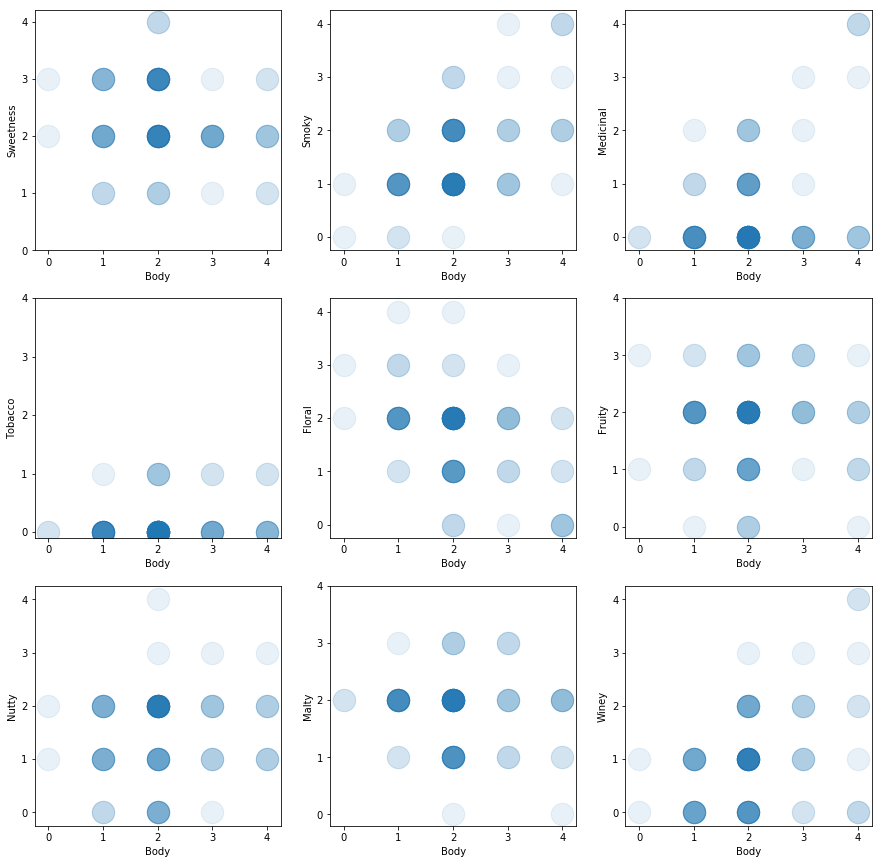

In [19]:
fig = plt.figure(figsize=(15,15))
ax1 = fig.add_subplot(3,3,1)
ax2 = fig.add_subplot(3,3,2)
ax3 = fig.add_subplot(3,3,3)
ax4 = fig.add_subplot(3,3,4)
ax5 = fig.add_subplot(3,3,5)
ax6 = fig.add_subplot(3,3,6)
ax7 = fig.add_subplot(3,3,7)
ax8 = fig.add_subplot(3,3,8)
ax9 = fig.add_subplot(3,3,9)

ax1.scatter(x = whisky_dataframe['Body'], y=whisky_dataframe['Sweetness'], alpha=0.1, s=500)
ax1.set_xticks([0, 1, 2, 3, 4])
ax1.set_yticks([0, 1, 2, 3, 4])
ax1.set_xlabel('Body')
ax1.set_ylabel('Sweetness')

ax2.scatter(x = whisky_dataframe['Body'], y=whisky_dataframe['Smoky'], alpha=0.1, s=500)
ax2.set_xticks([0, 1, 2, 3, 4])
ax2.set_yticks([0, 1, 2, 3, 4])
ax2.set_xlabel('Body')
ax2.set_ylabel('Smoky')

ax3.scatter(x = whisky_dataframe['Body'], y=whisky_dataframe['Medicinal'], alpha=0.1, s=500)
ax3.set_xticks([0, 1, 2, 3, 4])
ax3.set_yticks([0, 1, 2, 3, 4])
ax3.set_xlabel('Body')
ax3.set_ylabel('Medicinal')

ax4.scatter(x = whisky_dataframe['Body'], y=whisky_dataframe['Tobacco'], alpha=0.1, s=500)
ax4.set_xticks([0, 1, 2, 3, 4])
ax4.set_yticks([0, 1, 2, 3, 4])
ax4.set_xlabel('Body')
ax4.set_ylabel('Tobacco')

ax5.scatter(x = whisky_dataframe['Body'], y=whisky_dataframe['Floral'], alpha=0.1, s=500)
ax5.set_xticks([0, 1, 2, 3, 4])
ax5.set_yticks([0, 1, 2, 3, 4])
ax5.set_xlabel('Body')
ax5.set_ylabel('Floral')

ax6.scatter(x = whisky_dataframe['Body'], y=whisky_dataframe['Fruity'], alpha=0.1, s=500)
ax6.set_xticks([0, 1, 2, 3, 4])
ax6.set_yticks([0, 1, 2, 3, 4])
ax6.set_xlabel('Body')
ax6.set_ylabel('Fruity')

ax7.scatter(x = whisky_dataframe['Body'], y=whisky_dataframe['Nutty'], alpha=0.1, s=500)
ax7.set_xticks([0, 1, 2, 3, 4])
ax7.set_yticks([0, 1, 2, 3, 4])
ax7.set_xlabel('Body')
ax7.set_ylabel('Nutty')

ax8.scatter(x = whisky_dataframe['Body'], y=whisky_dataframe['Malty'], alpha=0.1, s=500)
ax8.set_xticks([0, 1, 2, 3, 4])
ax8.set_yticks([0, 1, 2, 3, 4])
ax8.set_xlabel('Body')
ax8.set_ylabel('Malty')

ax9.scatter(x = whisky_dataframe['Body'], y=whisky_dataframe['Winey'], alpha=0.1, s=500)
ax9.set_xticks([0, 1, 2, 3, 4])
ax9.set_yticks([0, 1, 2, 3, 4])
ax9.set_xlabel('Body')
ax9.set_ylabel('Winey')

plt.show()

In [20]:
whisky_data = whisky_dataframe.values
whisky_data

array([[2, 2, 2, ..., 2, 2, 2],
       [3, 3, 1, ..., 3, 3, 2],
       [1, 3, 2, ..., 2, 3, 2],
       ..., 
       [0, 3, 1, ..., 2, 1, 2],
       [2, 2, 1, ..., 1, 0, 0],
       [2, 3, 0, ..., 2, 2, 1]])

## Overfitting
### The more data you have the better? Not always:

__ The curse of dimentionality__
 
 
 _ When the dimensionality increases, the volume of the space increases so fast that the available data become sparse. _
 
 
__ Model Complexity__

#### Feature selection and extraction

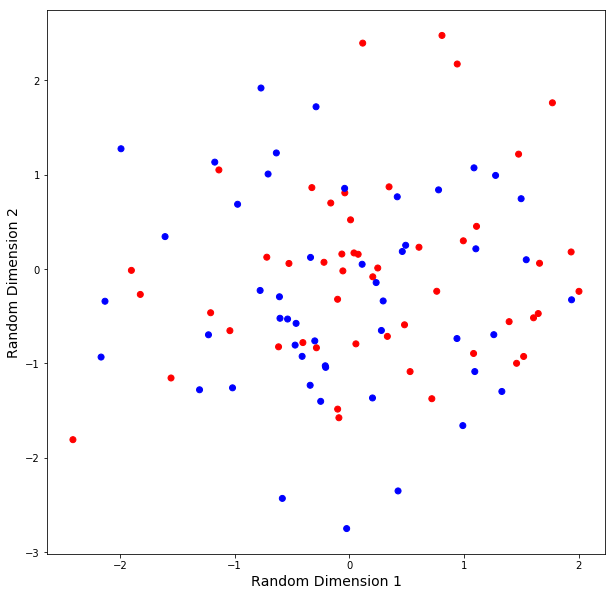

In [21]:
random_data = np.random.randn(100, 2)
random_labels = np.random.randint(0,2,100)

fig = plt.figure(figsize=(10,10))

plt.scatter(random_data[:, 0], random_data[:, 1], c=random_labels, cmap=cmap_bold)

plt.xlabel('Random Dimension 1', fontsize=14)
plt.ylabel('Random Dimension 2', fontsize=14)

plt.show()

In [22]:
clf = KNeighborsClassifier(n_neighbors=1)
clf.fit(random_data, random_labels)

print("Accuracy: {:0.3f}%".format(clf.score(random_data, random_labels)*100))


Accuracy: 100.000%


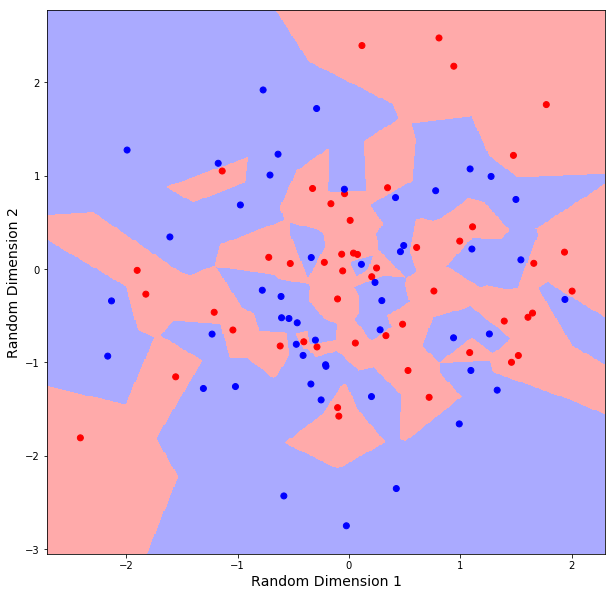

In [23]:
(xx, yy, Z) = predict_mesh(random_data, clf, h=0.01)

fig = plt.figure(figsize=(10,10))
plt.xlabel('Random Dimension 1', fontsize=14)
plt.ylabel('Random Dimension 2', fontsize=14)
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

plt.scatter(random_data[:, 0], random_data[:, 1], c=random_labels, cmap=cmap_bold)

plt.show()

## The curse of Dimensionality

__ More features != Better Results __

In [ ]:
random_labels = np.concatenate([np.ones((50,)), np.zeros((50,))])

random_data = np.concatenate([
    np.add(np.multiply(np.random.randn(50, 2), np.array([0.7, 1.5])), np.array([3, 1])),
    np.multiply(np.random.randn(50, 2), np.array([0.5, 3]))
    ]) 


fig = plt.figure(figsize=(8, 8))

plt.scatter(random_data[:, 0], random_data[:, 1], c=random_labels, cmap=cmap_bold)
plt.xlim((-4, 8))
plt.ylim((-6, 6))
plt.xlabel('Random Dimension 1', fontsize=14)
plt.ylabel('Random Dimension 2', fontsize=14)

plt.show()

## PCA

Principal componentes are the directions of largest variance

The eigenvectors with the largest eigenvalues are the principal components

In [ ]:
random_data =np.random.multivariate_normal(mean= [0, 0], cov=[[5, 5], [0, 0.5]], size=100)

fig = plt.figure(figsize=(8, 8))

plt.scatter(random_data[:, 0], random_data[:, 1])
plt.plot([-5, 5], [-5, 5], 'r--')
plt.plot([1.5, -1.5], [-1.5, 1.5], 'g--')

plt.xlim((-7, 7))
plt.ylim((-7, 7))
plt.title('Random Data with Principal Components', fontsize=16)

plt.xlabel('Random Dimension 1', fontsize=14)
plt.ylabel('Random Dimension 2', fontsize=14)

plt.show()

In [ ]:
pca = PCA(n_components=2)
pca.fit(random_data)
transformed_data = pca.fit_transform(random_data)

plt.figure(figsize=(8,8))
plt.scatter(transformed_data[:,0], transformed_data[:,1])
plt.plot([-5, 5], [0, 0], 'r--')
plt.xlim((-7, 7))
plt.ylim((-7, 7))
plt.title('Transformed Random Data', fontsize=16)
plt.xlabel('Random Dimension 1', fontsize=14)
plt.ylabel('Random Dimension 2', fontsize=14)

plt.show()

# Back to Scotch!

Let's apply what we learned to our dataset

In [24]:
pca = PCA(n_components=2, whiten=True) 
# Here whiten means centering the data around 0, which is needed so that PCA works correctly
transformed_data = pca.fit_transform(whisky_data)

In [25]:
print("% of variance explained by each component: 1st {:0.1f}% 2nd {:0.1f}%".format(
        pca.explained_variance_ratio_[0]*100, pca.explained_variance_ratio_[1]*100))


% of variance explained by each component: 1st 30.1% 2nd 19.2%


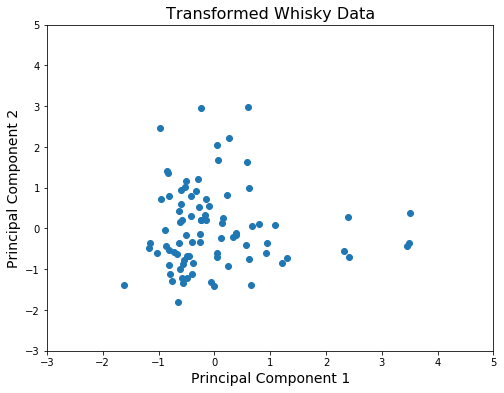

In [26]:
fig = plt.figure(figsize=(8,6))
plt.scatter(x = transformed_data[:,0], y=transformed_data[:,1])

plt.xlim((-3, 5))
plt.ylim((-3, 5))

plt.title('Transformed Whisky Data', fontsize=16)
plt.xlabel('Principal Component 1', fontsize=14)
plt.ylabel('Principal Component 2', fontsize=14)

plt.show()

TODO: Try PCA with 3 components? and plot them

### Predicting whether it has Tobacco taste

In [27]:
labels = whisky_dataframe['Tobacco']
whisky_data = whisky_dataframe.drop('Tobacco', axis=1).values

In [28]:
print("Percentage of Positive Labels: {:.2f}%".format(np.sum(labels)/len(labels)*100))

Percentage of Positive Labels: 11.63%


In [29]:
class_weight={0:1, 1: 10}

In [30]:
pca = PCA(n_components=2, whiten=True) 
# Here whiten means centering the data around 0, which is needed so that PCA works correctly
transformed_data = pca.fit_transform(whisky_data)

In [31]:
classf = LogisticRegression(random_state=42, class_weight=class_weight)

In [32]:
# Select parameters to use in Cross-Validation
classf_cv = classf
data_cv = transformed_data
N_CV = 10

# Cross Validation
t0 = time()
scores = cross_validation.cross_val_score(classf_cv, data_cv, labels, cv = N_CV)
print("Scores: ")
for i, score in enumerate(scores):
    print( '\t' + str(i) + ':\t' + str(score)) 
print("Accuracy: %0.3f (+/- %0.3f)" % (scores.mean(), scores.std() * 2))
print("\nCross val done in %0.3fs." % (time() - t0))

NameError: name 'cross_validation' is not defined

In [33]:
train_data, test_data, train_labels, test_labels = train_test_split(
    transformed_data, labels, test_size=0.20)

classf = LogisticRegression(class_weight=class_weight)

classf.fit(train_data, train_labels)

predicted_labels = classf.predict(test_data)
confusion_matrix(test_labels, predicted_labels)

array([[13,  4],
       [ 1,  0]])

 ## Unsupervised Learning
 
 ### Clustering: K -means
 
 TODO: Explain with toy data set, add video / GIF?

#### Clustering Scotch:

### Now let's make some predictions: (Tobacco ?)

### How evaluate our models? 
#### Cross Validation


### There is so much more

This can not even be considered scraping the surface. Go ahead and experiment it's a very interesting field, and there are tons of information and places to learn from!

In [ ]:
whisky_data = pd.read_csv(filepath_or_buffer="Meta-Critic Whisky Database – Selfbuilts Whisky Analysis.csv")
whisky_data.describe()
whisky_data.head()
